In [3]:
! pip install opencv-python

     |████████████████████████████████| 49.1MB 3.2MB/s eta 0:00:01


In [132]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.utils import resample
import os
import cv2
import random
import pickle

In [23]:
# print(img_array.shape)
 #         img_array = mpimg.imread(os.path.join(path,img))

(288, 432, 3)


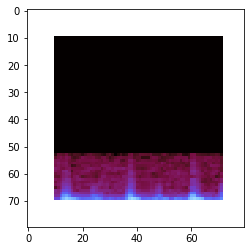

In [28]:
img_size = 80 #resize image, makes it blurry as number decreases

# new_array = cv2.resize(img_array, (img_size,img_size))
# plt.imshow(new_array)
# plt.show()

In [107]:
training_data = []

cwd = os.getcwd() #directory of all the data images
categories = ['normal','abnormal']

def create_training_data():
    for category in categories:
        path = os.path.join(cwd, category) #path to the data directories
        #take index of folder as 0/1 for CNN
        class_num = categories.index(category) 
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (img_size,img_size))
                training_data.append([new_array, class_num]) #append resized array to label
            except Exception as e:
                pass
            
create_training_data()            
            
            
            

In [118]:
#bootstrapping to balance dataset if unbalanced
def balance_dataset(data):
    """
    boostrapping to balance binary dataset
    may need to think through for multi-class
    """
        
    norm = [e for e in data if e[1] == 0] 
    abnorm = [e for e in data if e[1] == 1]
    
    print("OG norm sample size: %i" %len(norm))
    print("OG abnorm sample size: %i" %len(abnorm))

    if len(norm) < len(abnorm):
        sample_size = len(abnorm)
        new_norm = resample(norm, 
                            replace=True,
                            n_samples = sample_size)
        output = new_norm + abnorm
    
    elif len(norm) > len(abnorm):
        sample_size = len(norm)
        new_abnorm = resample(abnorm, 
                            replace=True,
                            n_samples = sample_size)
        output = norm + new_abnorm
        
    else:
        pass
    
    return output
    

In [130]:
#Randomizes new balanced dataset
balanced_data = balance_dataset(training_data)
random.shuffle(balanced_data)
class_n = [e for e in balanced_data if e[1] == 0]
class_ab = [e for e in balanced_data if e[1] == 1]
print("new norm sample size: %i" %len(norm))
print("new abnorm sample size: %i" %len(abnorm))

In [134]:
#Setting feature and label datasets
X = [] #features
y = [] #labels

for features, label in balanced_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1,img_size,img_size,3) #reshapes for input into CNN


In [135]:
#Saving them to not have to reload data everytime

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()


In [136]:
#Reopen
# pickle_in = open("X.pickle","rb")
# X = pickle.load(pickle_in)